In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


In [8]:

# Read the CSV data
df = pd.read_csv(r'GPM_DataProject\Urban-Rainfall-Analysis-and-Prediction-GPM-Data-project-\data_preprocessing\finalprecipitation_data.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select numerical features for prediction
numerical_columns = ['Specific_Humidity_10m', 'Air_Temperature_2m', 'Eastward_Wind_10m', 'Northward_Wind_10m']
df[numerical_columns] = df[numerical_columns].astype(float)

# Feature engineering for 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.weekday

# Encode categorical 'Zone_Name'
label_encoder = LabelEncoder()
df['Zone_Code'] = label_encoder.fit_transform(df['Zone_Name'])

# Define features (X) and target variable (y)
X = df[['Zone_Code', 'Year', 'Month', 'Day_of_Week'] + numerical_columns]
y = df['Precipitation_mm']

# Time series split for training and testing
tscv = TimeSeriesSplit(n_splits=6)
for train_index, test_index in tscv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Feature scaling
  scaler = MinMaxScaler(feature_range=(0, 1))
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Initialize XGBoost Regressor
  xgb_regressor = XGBRegressor(n_estimators=500, random_state=42)

  # Train the model
  xgb_regressor.fit(X_train, y_train)

  # Predictions
  y_pred_train = xgb_regressor.predict(X_train)
  y_pred_test = xgb_regressor.predict(X_test)

  # Evaluate the model
  print("Training RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
  print("Testing RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))







Training RMSE: 0.0037452069870372432
Testing RMSE: 1.4230964667914954
Training RMSE: 0.008176200117990588
Testing RMSE: 1.632260073321074
Training RMSE: 0.017849697718057445
Testing RMSE: 2.6372873739698823
Training RMSE: 0.03597173936205178
Testing RMSE: 3.134839853895253
Training RMSE: 0.05391027817656251
Testing RMSE: 2.360423011488447
Training RMSE: 0.07921200474496046
Testing RMSE: 3.9305821970622055


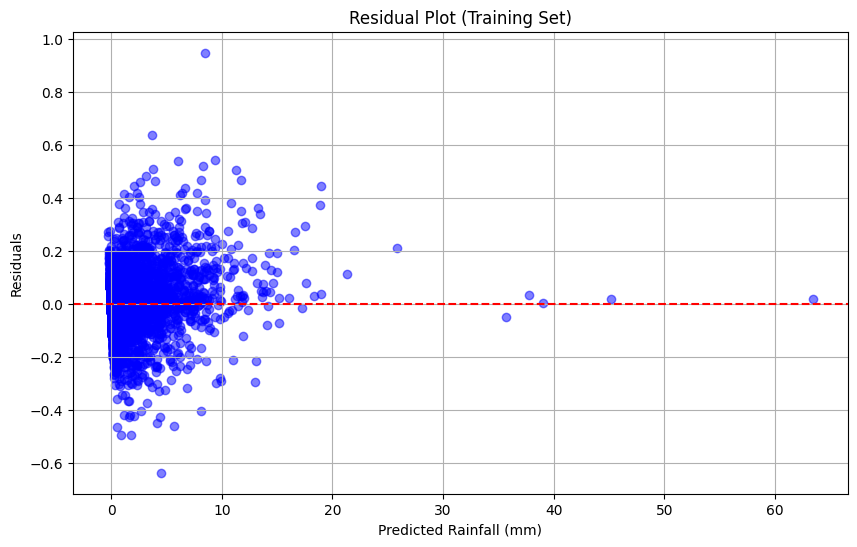

In [10]:

# Calculate residuals for training and testing sets
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

# Plotting residual plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, train_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Training Set)')
plt.xlabel('Predicted Rainfall (mm)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

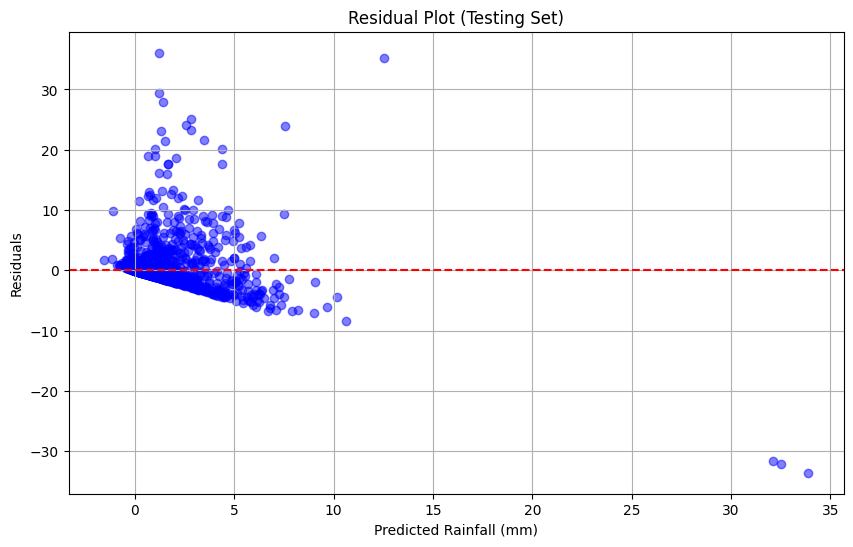

In [11]:

# Plotting residual plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, test_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Testing Set)')
plt.xlabel('Predicted Rainfall (mm)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()